# 시뮬레이션방법론 실습

## Ch2. 난수 생성 방법

### Acceptance-rejection method

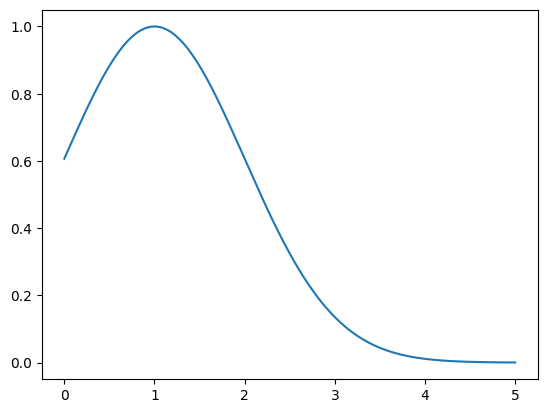

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

f = lambda x: 2/np.sqrt(2*np.pi)*np.exp(-x**2/2)
g = lambda x: np.exp(-x)
Ginv = lambda x: -np.log(1-x)
x = np.linspace(0,5,501)
c = np.sqrt(2/np.pi)*np.exp(0.5)

#c = 1
plt.plot(x,f(x)/(c*g(x)))
plt.show()

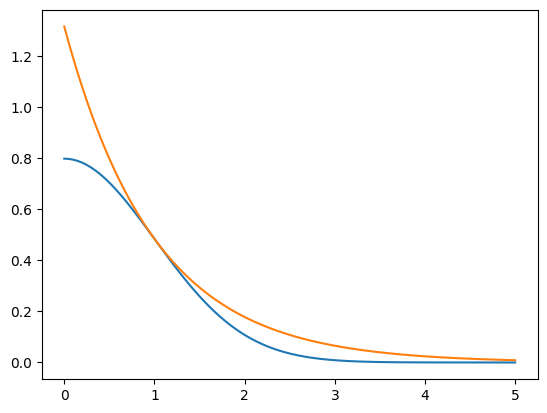

In [24]:
plt.plot(x,f(x))
plt.plot(x,c*g(x))
plt.show()

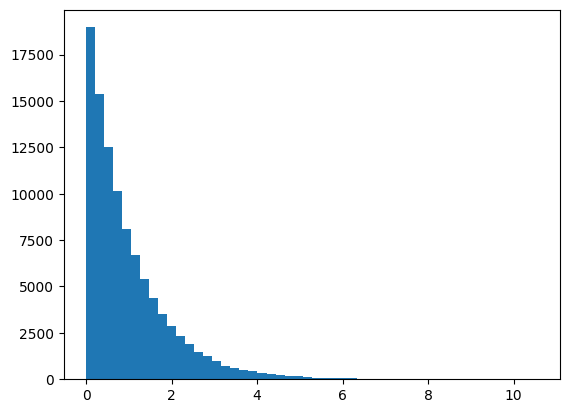

In [25]:
#random sampling from Exponential dist.
n = 100000
e = np.random.rand(n)
x = Ginv(e)
plt.hist(x, bins=50)
plt.show()

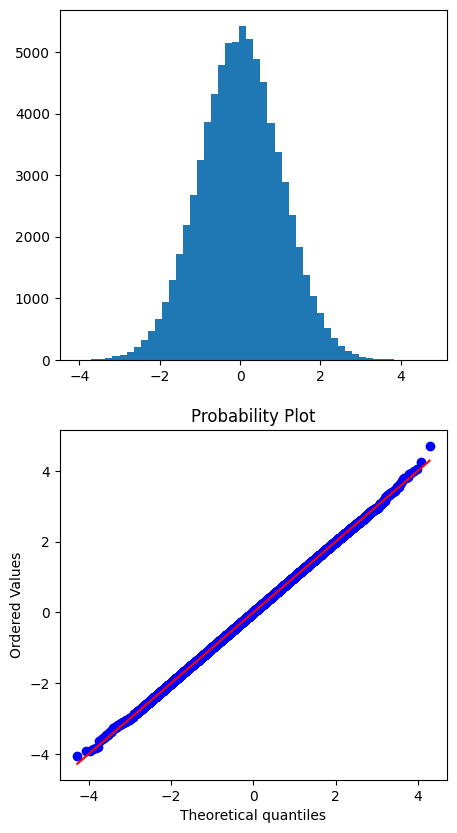

In [26]:
#acceptance-rejection
u = np.random.rand(n)
idx = u < (f(x) / (c*g(x)))
y = x[idx]

#signx
s = np.random.rand(len(y))
sign = (+1)*(s>0.5) + (-1)*(s<=0.5)
z  = y * sign

fig, ax = plt.subplots(2,1,figsize=(5,10))
ax[0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1])
plt.show()

In [27]:
# accept된 갯수, 통계량
z = pd.Series(z)
print("Size = ", len(z))
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Size =  76242
Mean =  0.004399928352169691
Std =  0.9994359934475461
Skewness =  -0.0035700194262359955
Kurtosis =  -0.020022846863712473


Mean =  0.005319050470821333
Std =  1.0041333833693569
Skewness =  0.007870653875667408
Kurtosis =  0.026864384771177363


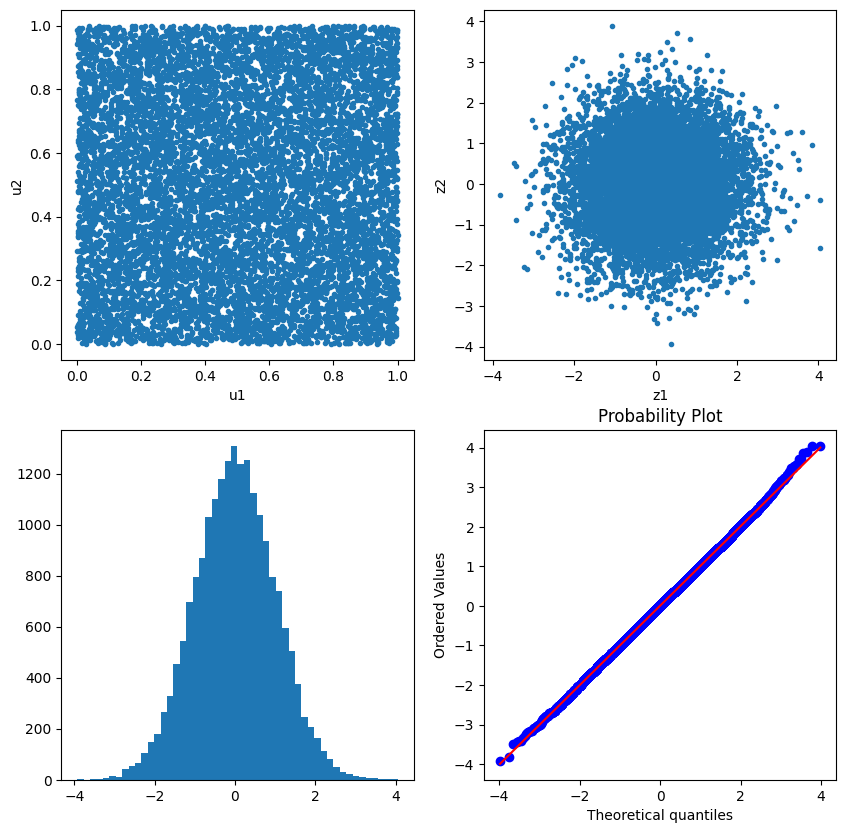

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


u1 = np.random.rand(10000)
u2 = np.random.rand(10000)

z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

### Box-muller method
#### u1과 u2를 극좌표 변환(길이,각도)하여 표준정규난수를 생성

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-3.08879653, -2.96225972, -2.93767351, ...,  2.89101449,
          2.92098679,  3.03513649])),
 (0.9735473709334279, 0.01518582487043528, 0.9993181942933621))

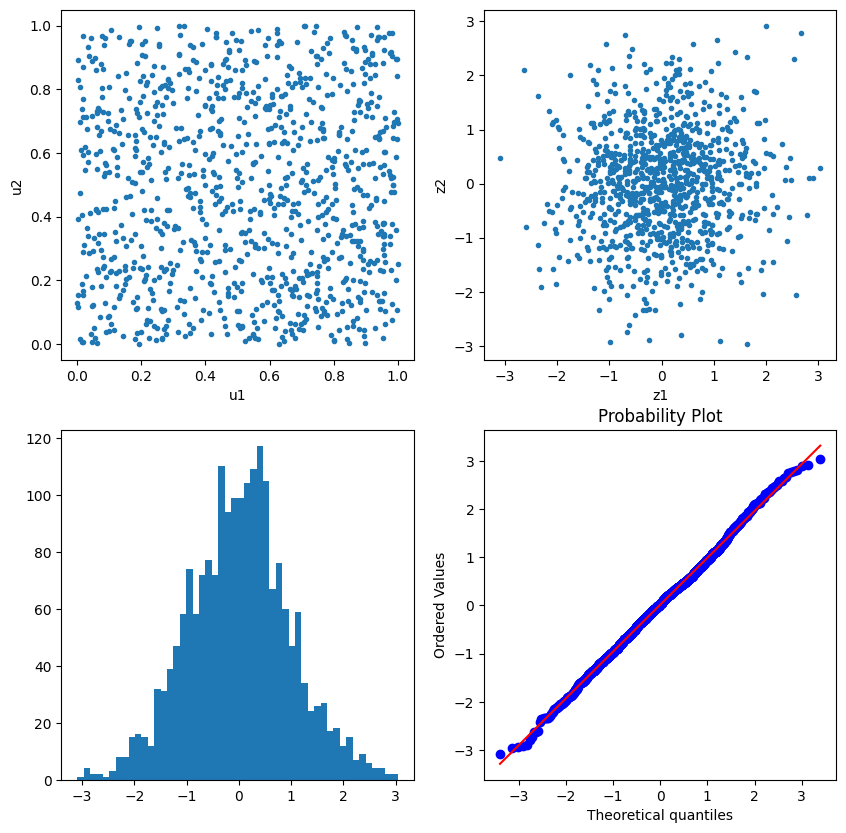

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


u1 = np.random.rand(1000)
# u1 = np.array(np.repeat(0.2,1000))

u2 = np.random.rand(1000)
# u2 = np.repeat(0.3,1000)

z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

In [30]:
z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Mean =  0.015185824870435093
Std =  0.9729848649387326
Skewness =  0.026318252305075517
Kurtosis =  0.10017595589855377


### Marsaglia's polar method

((array([-3.92200263, -3.70288844, -3.58286194, ...,  3.58286194,
          3.70288844,  3.92200263]),
  array([-2.75062726, -2.54667074, -2.3831233 , ...,  2.54073674,
          2.5642353 ,  2.63545236])),
 (0.7004291238850505, 0.009082295652274254, 0.9999096754512135))

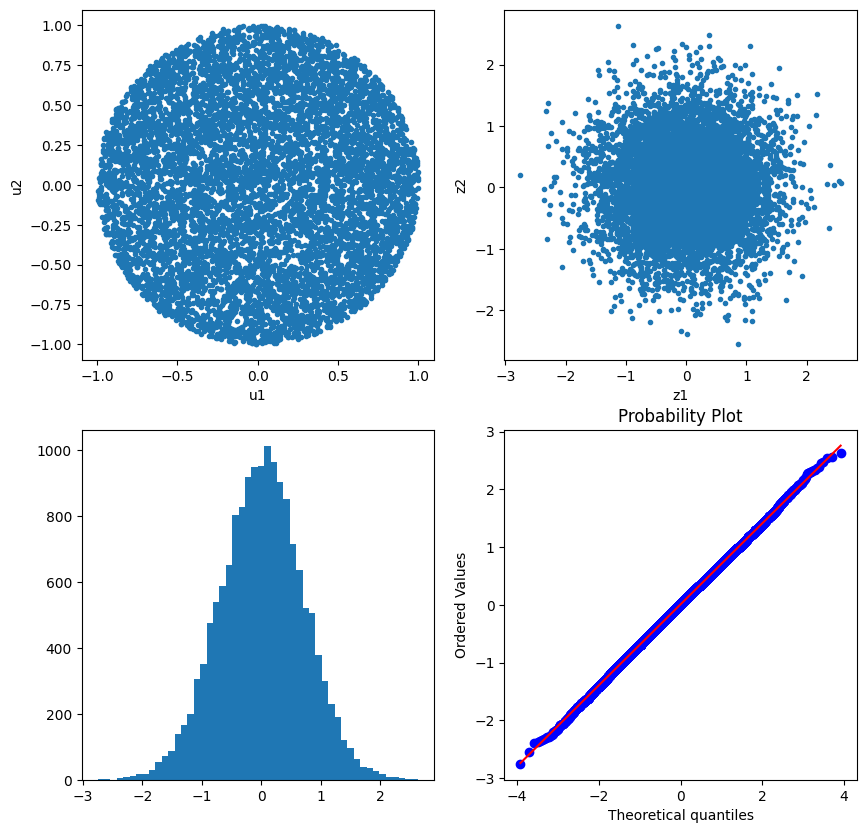

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

u1 = 2*np.random.rand(10000) - 1
u2 = 2*np.random.rand(10000) - 1
idx = u1**2+u2**2<1
u1 = u1[idx]
u2 = u2[idx]
r = np.sqrt(u1**2 + u2**2)
z1 = u1*np.sqrt(-2*np.log(r)/(r**2))
z2 = u2*np.sqrt(-2*np.log(r)/(r**2))

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(u1,u2,'.')
ax[0,0].set_xlabel("u1")
ax[0,0].set_ylabel("u2")
ax[0,1].plot(z1,z2,'.')
ax[0,1].set_xlabel("z1")
ax[0,1].set_ylabel("z2")

z = np.concatenate([z1,z2])
ax[1,0].hist(z, bins=50)
stats.probplot(z, dist="norm", plot=ax[1,1])

In [36]:
# 표준편차 이상함
z = pd.Series(z)
print("Mean = ", z.mean())
print("Std = ", z.std())
print("Skewness = ", z.skew())
print("Kurtosis = ", z.kurt())

Mean =  0.005214667686108389
Std =  0.7034156408834322
Skewness =  -0.010790249902950888
Kurtosis =  -0.022110372173252735


### Correlated random

In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

corr = np.array([[1,0.3,0.5],[0.3,1,0.6],[0.5,0.6,1]])
pos_def = np.all(np.linalg.eigvals(corr) > 0)
print(corr)
print(pos_def)

#%%
#Cholesky Decomposition
c = np.linalg.cholesky(corr)
x = np.random.randn(10000,3)
y = x @ c.T

y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()

print("Correlation")
print(y.corr())

[[1.  0.3 0.5]
 [0.3 1.  0.6]
 [0.5 0.6 1. ]]
True
Mean
            z1        z2        z3
mean  0.005413  0.014955  0.002848
std   0.994726  0.999791  0.999323

Correlation
          z1        z2        z3
z1  1.000000  0.293904  0.482619
z2  0.293904  1.000000  0.601780
z3  0.482619  0.601780  1.000000


In [43]:
#Positive Definite 하지 않은 상관계수 행렬 생성
pos_def = True
while pos_def:
    x = np.random.randn(1000, 2)
    x = np.concatenate([x[:,0:1], x[:,0:1]+x[:,1:2], x[:,0:1]-2*x[:,1:2]], axis=1)
    corr = pd.DataFrame(x).corr()
    pos_def = np.all(np.linalg.eigvals(corr) > 0)

print(corr)
print(pos_def)

          0         1         2
0  1.000000  0.716544  0.460920
1  0.716544  1.000000 -0.288758
2  0.460920 -0.288758  1.000000
False


In [44]:
#cholesky: error
#c = np.linalg.cholesky(corr)

#Eigenvalue Decomposition
values, vectors = np.linalg.eig(corr)
values = np.maximum(0, values)
B = vectors @ np.diag(np.sqrt(values))
print(B)
print()
print(B @ B.T)
print()

[[ 0.          0.98180222  0.18990632]
 [ 0.          0.83597193 -0.54877221]
 [ 0.          0.28400185  0.95882373]]

[[ 1.          0.71654378  0.46092033]
 [ 0.71654378  1.         -0.28875824]
 [ 0.46092033 -0.28875824  1.        ]]



In [45]:
z = np.random.randn(10000,3)
y = z @ B.T

y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()
print("Correlation")
print(y.corr())

Mean
            z1        z2        z3
mean  0.011488  0.003370  0.011480
std   1.001032  1.010722  0.994734

Correlation
          z1        z2        z3
z1  1.000000  0.722161  0.447696
z2  0.722161  1.000000 -0.295222
z3  0.447696 -0.295222  1.000000


In [46]:
#Singular value decomposition
print("=== original data ===")
print(pd.DataFrame(x).apply(['mean','std']))
print(pd.DataFrame(x).corr())
print()

U, S, Vh = np.linalg.svd(x)
np.allclose(U[:,:3] @ np.diag(S) @ Vh, x)

B = Vh.T @ np.diag(S) / np.sqrt(len(x))
z = np.random.randn(10000,3)
y = z @ B.T

print("=== simulation data ===")
y = pd.DataFrame(y, columns=['z1','z2','z3'])
print("Mean")
print(y.apply(['mean','std']))
print()
print("Correlation")
print(y.corr())

=== original data ===
             0         1         2
mean -0.031273 -0.024253 -0.045312
std   1.025723  1.426155  2.241957
          0         1         2
0  1.000000  0.716544  0.460920
1  0.716544  1.000000 -0.288758
2  0.460920 -0.288758  1.000000

=== simulation data ===
Mean
            z1        z2        z3
mean -0.006377 -0.013568  0.008004
std   1.027312  1.432960  2.227500

Correlation
          z1        z2        z3
z1  1.000000  0.721764  0.454958
z2  0.721764  1.000000 -0.287987
z3  0.454958 -0.287987  1.000000
